# Name: Shashank A Udgirkar
# Roll no: 31384
# Batch: N3

In [45]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from word2number import w2n
import scipy.stats as stats
import pylab

In [46]:
#Loading dataset in pandas dataframe
df=pd.read_csv('Social_Network_Ads.csv')

In [47]:
#Display first five rows
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [48]:
#Display Last five rows
df.tail

<bound method NDFrame.tail of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [49]:
# Displays information of whole dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [50]:
#Displays initial statistics 
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [51]:
# Return the count of Null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Logistic Regression

In [52]:
#Correlation
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


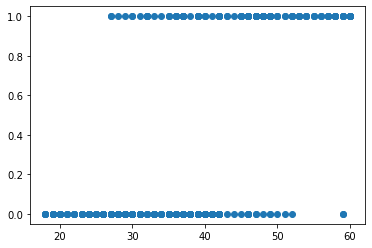

In [53]:
plt.scatter(df['Age'],df['Purchased'])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x=df[['Age']]
y=df['Purchased']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [57]:
clf=linear_model.LogisticRegression()

In [58]:
clf.fit(x_train,y_train)

LogisticRegression()

In [80]:
y_pred=clf.predict(x_test)

In [81]:
y_test

44     0
141    0
15     0
192    0
290    1
      ..
87     0
145    0
324    1
298    0
384    1
Name: Purchased, Length: 80, dtype: int64

# Accuracy

In [92]:
clf.score(x_test,y_test)*100

83.75

In [84]:
#Mean Squared error
print(np.mean((y_pred-y_test)**2))

0.1625


Text(0, 0.5, 'Predicted Values')

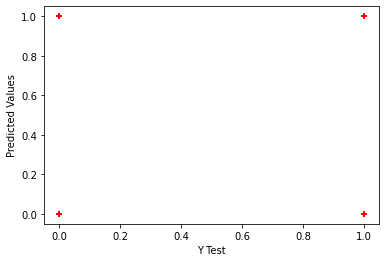

In [85]:
plt.scatter(y_test,y_pred,marker='+',color='r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Values')

# Predictors as Age and EstimatedSalary

In [62]:
#With age and estimated salary
x1=df[['Age','EstimatedSalary']]
y1=df['Purchased']

In [63]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2)

In [64]:
clf1=linear_model.LogisticRegression()

In [65]:
clf1.fit(x_train1,y_train1)

LogisticRegression()

In [66]:
clf1.predict(x_test1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
y_test1

199    0
378    1
143    0
367    1
392    1
      ..
272    1
117    0
175    0
23     1
220    0
Name: Purchased, Length: 80, dtype: int64

In [93]:
#Accuracy Decreases
clf1.score(x_test1,y_test1)*100

52.5

In [69]:
#Removing Outliers
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
Q1,Q3

(29.75, 46.0)

In [70]:
IQR=Q3-Q1

In [71]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(5.375, 70.375)

In [72]:
df[(df['Age']<lower_limit)|(df['Age']>upper_limit)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [73]:
# Conclusion is that their are no outliers in Age
# Now check the outliers for EstimatedSalary

In [74]:
Q1=df['EstimatedSalary'].quantile(0.25)
Q3=df['EstimatedSalary'].quantile(0.75)
Q1,Q3

(43000.0, 88000.0)

In [75]:
IQR=Q3-Q1

In [76]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-24500.0, 155500.0)

In [77]:
df[(df['EstimatedSalary']<lower_limit)|(df['EstimatedSalary']>upper_limit)]

,User ID,Gender,Age,EstimatedSalary,Purchased


In [78]:
# Conclusion is that their are no outliers in EstimatedSalary

# Model Evaluation

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89        56
           1       0.76      0.67      0.71        24

    accuracy                           0.84        80
   macro avg       0.81      0.79      0.80        80
weighted avg       0.83      0.84      0.83        80



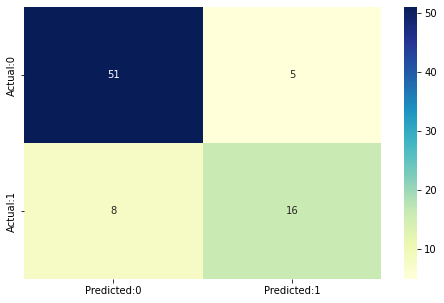

In [89]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [90]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [91]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.8375 
 The Missclassification = 1-Accuracy =                   0.16249999999999998 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.6666666666666666 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9107142857142857 
 Positive Predictive value = TP/(TP+FP) =                0.7619047619047619 
 Negative predictive Value = TN/(TN+FN) =                0.864406779661017 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.466666666666665 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.36601307189542487
